In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

In [43]:
df_raw = pd.read_csv('data/patient_dataset.csv')
df_raw.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [44]:
df_raw.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [45]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

In [46]:
df_raw['residence_type'].value_counts()

Urban    2778
Rural    2767
Name: residence_type, dtype: int64

In [47]:
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Smoker':0,'Non-Smoker':1})
df_raw['residence_type'] = df_raw['residence_type'].map({'Urban':0,'Rural':1})

In [48]:
df_raw['residence_type'].value_counts()

0.0    2778
1.0    2767
Name: residence_type, dtype: int64

In [49]:
df_raw.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0.0,0.0
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,0.0,NaN
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1.0,1.0
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1.0,0.0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1.0,0.0


In [50]:
df_raw.info()
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(np.round(imputer.fit_transform(df_raw)), columns=df_raw.columns)
display(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   float64
 15  smoking_status     5524 non-null   float64
dtypes: float64(8), int64(8)


,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24.0,1.0,4.0,250.0,139.0,212.0,0.0,108.0,33.0,109.0,38.0,0.0,1.0,1.0,0.0,0.0
1,29.0,0.0,4.0,132.0,187.0,147.0,0.0,202.0,42.0,108.0,26.0,0.0,1.0,1.0,0.0,1.0
2,46.0,0.0,3.0,271.0,185.0,193.0,0.0,149.0,43.0,102.0,38.0,2.0,1.0,0.0,1.0,1.0
3,73.0,0.0,2.0,102.0,200.0,125.0,0.0,105.0,77.0,165.0,19.0,1.0,0.0,1.0,1.0,0.0
4,49.0,1.0,3.0,91.0,163.0,192.0,0.0,162.0,31.0,170.0,13.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76.0,1.0,1.0,117.0,247.0,88.0,1.0,104.0,22.0,179.0,42.0,2.0,1.0,0.0,1.0,1.0
5996,51.0,1.0,2.0,173.0,297.0,81.0,0.0,208.0,74.0,82.0,24.0,1.0,0.0,1.0,0.0,1.0
5997,70.0,0.0,2.0,120.0,234.0,111.0,0.0,139.0,45.0,86.0,40.0,1.0,0.0,1.0,0.0,1.0
5998,78.0,0.0,2.0,131.0,189.0,133.0,1.0,196.0,83.0,150.0,25.0,1.0,1.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   float64
 1   gender             6000 non-null   float64
 2   chest_pain_type    6000 non-null   float64
 3   blood_pressure     6000 non-null   float64
 4   cholesterol        6000 non-null   float64
 5   max_heart_rate     6000 non-null   float64
 6   exercise_angina    6000 non-null   float64
 7   plasma_glucose     6000 non-null   float64
 8   skin_thickness     6000 non-null   float64
 9   insulin            6000 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   float64
 13  heart_disease      6000 non-null   float64
 14  residence_type     6000 non-null   float64
 15  smoking_status     6000 non-null   float64
dtypes: float64(16)
memory us

In [51]:
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24.0,1.0,4.0,250.0,139.0,212.0,0.0,108.0,33.0,109.0,38.0,0.0,1.0,1.0,0.0,0.0
1,29.0,0.0,4.0,132.0,187.0,147.0,0.0,202.0,42.0,108.0,26.0,0.0,1.0,1.0,0.0,1.0
2,46.0,0.0,3.0,271.0,185.0,193.0,0.0,149.0,43.0,102.0,38.0,2.0,1.0,0.0,1.0,1.0
3,73.0,0.0,2.0,102.0,200.0,125.0,0.0,105.0,77.0,165.0,19.0,1.0,0.0,1.0,1.0,0.0
4,49.0,1.0,3.0,91.0,163.0,192.0,0.0,162.0,31.0,170.0,13.0,1.0,1.0,1.0,1.0,0.0


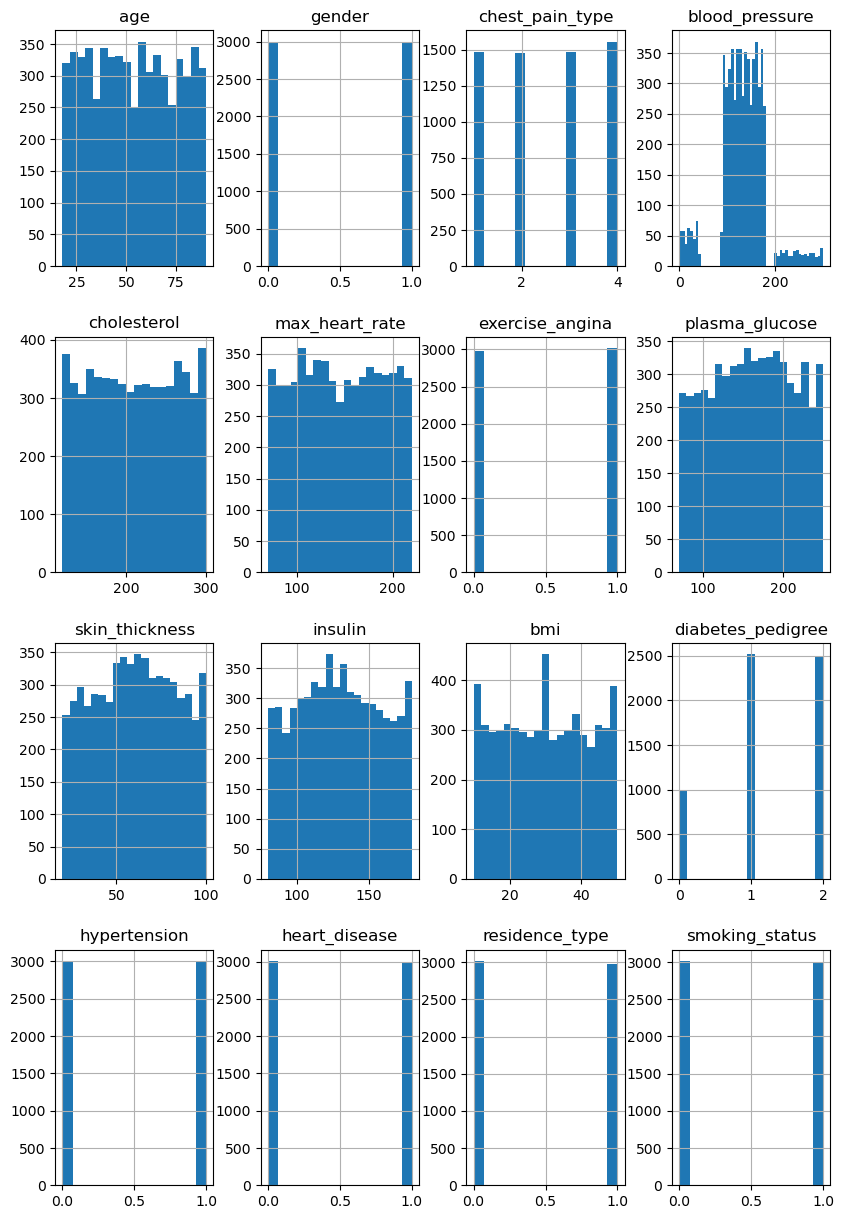

In [52]:
df.hist(bins = 'auto', figsize= (10,15))
plt.show()

In [53]:
import plotly.express as px

In [54]:
histAge = px.histogram(df, x='age')
histBmi = px.histogram(df, x='bmi')
histBlood = px.histogram(df, x='blood_pressure')


histAge.show()
histBmi.show()
histBlood.show()

In [55]:
q1 = df['blood_pressure'].quantile(0.25)
q3 = df['blood_pressure'].quantile(0.75)
print('Q1 : ',q1)
print('Q3 : ',q3)
IQR = q3-q1
print('IQR : ',IQR)

Q1 :  109.0
Q3 :  161.0
IQR :  52.0


In [56]:
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

print("lower_bound : ", lower_bound)
print("upper Bound : ",upper_bound)

lower_bound :  31.0
upper Bound :  239.0


In [57]:
total_outlierBlood = len(df[(df['blood_pressure'] < lower_bound) | (df['blood_pressure'] > upper_bound)])


In [58]:
print(total_outlierBlood)

498


In [59]:
df = df[(df['blood_pressure'] > lower_bound) & (df['blood_pressure'] < upper_bound)]
df.head()


,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
1,29.0,0.0,4.0,132.0,187.0,147.0,0.0,202.0,42.0,108.0,26.0,0.0,1.0,1.0,0.0,1.0
3,73.0,0.0,2.0,102.0,200.0,125.0,0.0,105.0,77.0,165.0,19.0,1.0,0.0,1.0,1.0,0.0
4,49.0,1.0,3.0,91.0,163.0,192.0,0.0,162.0,31.0,170.0,13.0,1.0,1.0,1.0,1.0,0.0
6,48.0,0.0,3.0,143.0,275.0,165.0,0.0,248.0,51.0,136.0,28.0,1.0,1.0,1.0,1.0,1.0
8,20.0,0.0,3.0,113.0,127.0,139.0,1.0,123.0,71.0,120.0,27.0,2.0,1.0,0.0,0.0,1.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5482 entries, 1 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5482 non-null   float64
 1   gender             5482 non-null   float64
 2   chest_pain_type    5482 non-null   float64
 3   blood_pressure     5482 non-null   float64
 4   cholesterol        5482 non-null   float64
 5   max_heart_rate     5482 non-null   float64
 6   exercise_angina    5482 non-null   float64
 7   plasma_glucose     5482 non-null   float64
 8   skin_thickness     5482 non-null   float64
 9   insulin            5482 non-null   float64
 10  bmi                5482 non-null   float64
 11  diabetes_pedigree  5482 non-null   float64
 12  hypertension       5482 non-null   float64
 13  heart_disease      5482 non-null   float64
 14  residence_type     5482 non-null   float64
 15  smoking_status     5482 non-null   float64
dtypes: float64(16)
memory us

In [61]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
x = scaler.fit_transform(df) 

pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [63]:
# x.shape
x[:, 0]
# x[:, 1]
x.ndim
# print(x)
x.shape

(5482, 2)

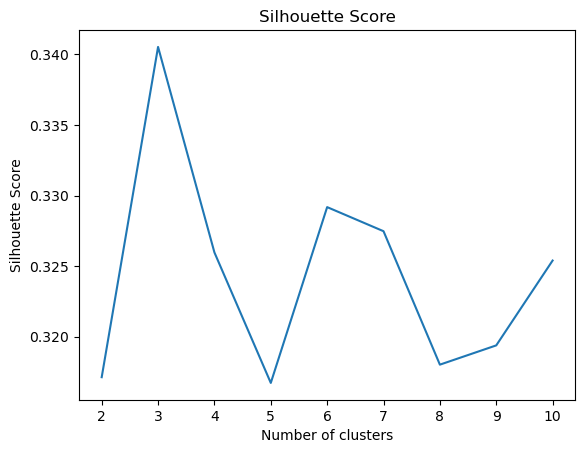

In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(x) 
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores for different values of k
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#  Higher Silhouette Scores indicate better-defined clusters.

In [65]:
n_clusters = 3  # The number of clusters you want
clustering = KMeans(n_clusters= n_clusters, init='random', n_init=10, max_iter=300)

clustering.fit(x)
labels = clustering.labels_
print(labels)

[0 1 1 ... 2 2 2]


In [66]:
len(labels)

5482

In [67]:
df["Clus_label"] = labels
df.head(5)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status,Clus_label
1,29.0,0.0,4.0,132.0,187.0,147.0,0.0,202.0,42.0,108.0,26.0,0.0,1.0,1.0,0.0,1.0,0
3,73.0,0.0,2.0,102.0,200.0,125.0,0.0,105.0,77.0,165.0,19.0,1.0,0.0,1.0,1.0,0.0,1
4,49.0,1.0,3.0,91.0,163.0,192.0,0.0,162.0,31.0,170.0,13.0,1.0,1.0,1.0,1.0,0.0,1
6,48.0,0.0,3.0,143.0,275.0,165.0,0.0,248.0,51.0,136.0,28.0,1.0,1.0,1.0,1.0,1.0,0
8,20.0,0.0,3.0,113.0,127.0,139.0,1.0,123.0,71.0,120.0,27.0,2.0,1.0,0.0,0.0,1.0,1


In [68]:
dfNew = pd.DataFrame(data=x,columns=['PCA1', 'PCA2'])
dfNew.head()
dfNew["Clus_label"] = labels

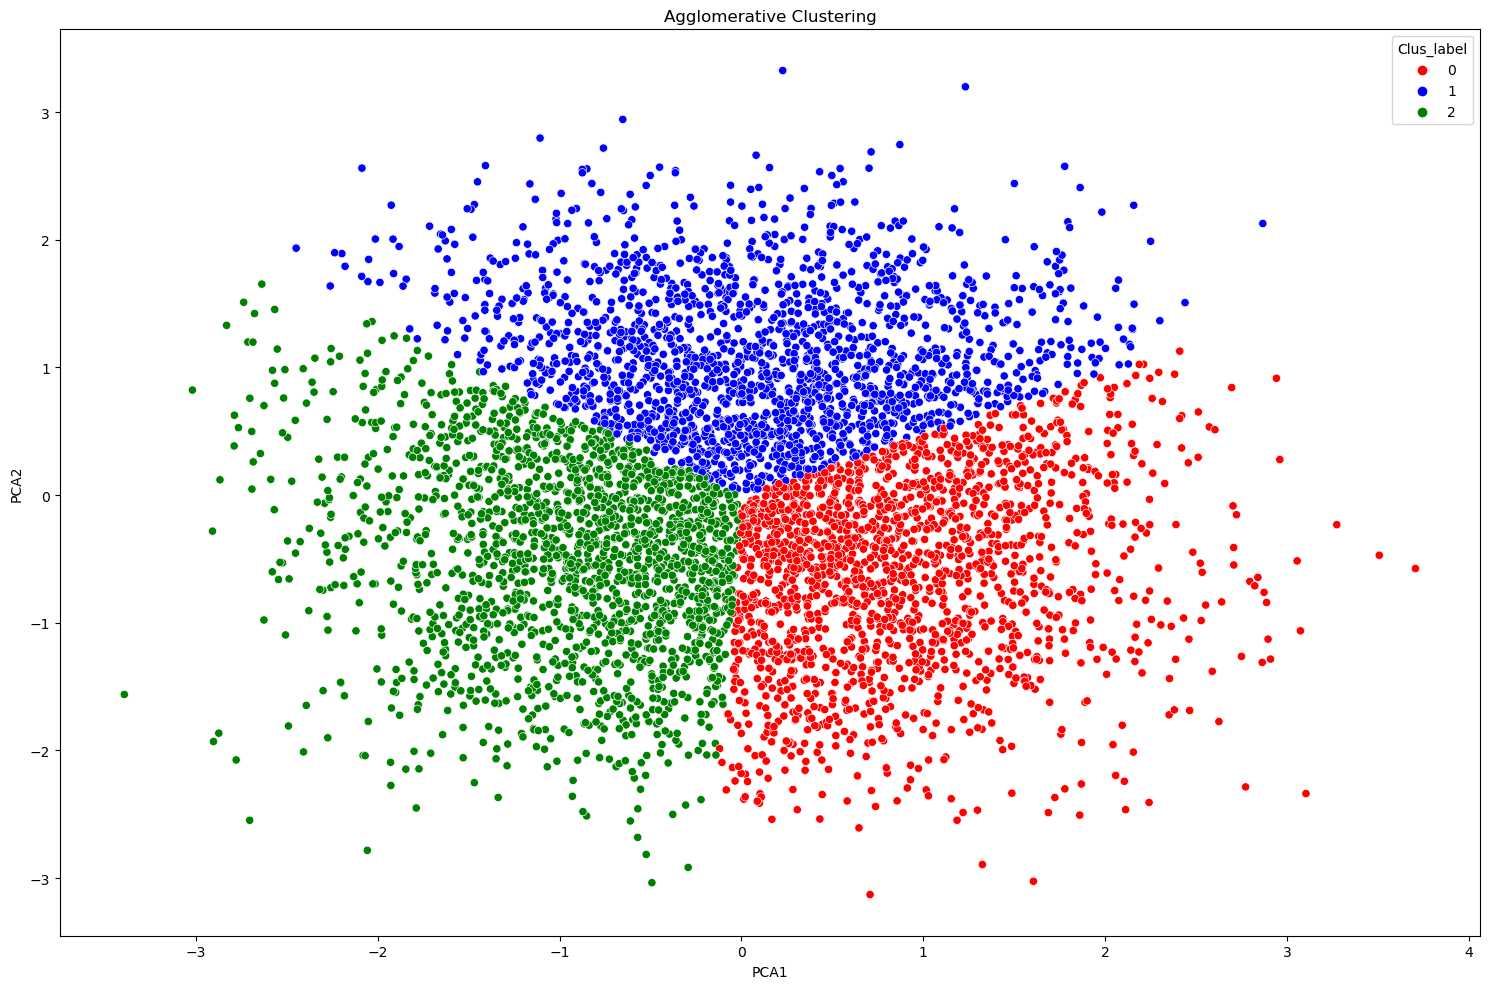

In [69]:
# Plot KMeans clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Clus_label', data=dfNew, palette = ['red','blue','green'])
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()